In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand,randint
from math import exp
from timeit import default_timer as timer

In [266]:
class SA():
    def __init__(self,length,reqs,TI,TL,f,minIter,maxEqCIter):
        self.length=length
        self.reqs=reqs
        self.minIter=minIter
        self.maxEqCIter=maxEqCIter
        self.n=len(self.reqs)
        self.TI=TI
        self.TL=TL
        self.f=f
    def ShuffleRequests(self):
        np.random.shuffle(self.reqs)
    def GetTwoNumber(self):
        x,y=np.random.choice(self.n,2,replace=False)
        if x>y:
            return y,x
        return x,y
    def GoNeighbor(self,a):
        x,y=self.GetTwoNumber()
        b=a.copy()
        b[x],b[y]=a[y],a[x]
        return b
    def GetNumberStocks(self,a):
        t=0
        r=1
        for d in a:
            if d+t>self.length:
                r+=1
                t=0
            t+=d
        return r
    def RunOneT(self,T,cur,cCur):
        nex=self.GoNeighbor(cur)
        cNex=self.GetNumberStocks(nex)
        deltaC=cNex-cCur
        if deltaC<0:
            cur=nex
            cCur=cNex
        elif deltaC>0:
            q=rand(1)
            if q<exp(-deltaC/T):
                cur=nex
                cCur=cNex
        return cur,cCur
    def PrintBest(self):
        t=0
        l=0
        for i,d in enumerate(self.best):
            if d+t>self.length:
                print(self.best[l:i])
                l=i
                t=0
            t+=d
        print(self.best[l:])
    def run(self):
        start=timer()
        self.ShuffleRequests()
        self.best=self.reqs
        self.cBest=self.GetNumberStocks(self.best)
        cur=self.reqs
        cCur=self.cBest
        T=self.TI
        ite=0
        eqI=0
        cCurs=np.array([cCur],dtype=np.int64)
        cBests=np.array([cCur],dtype=np.int64)
        while(self.cBest>1 and T>0):
            for i in range(self.TL):
                eqt=0
                lastC=cCur
                cur,cCur=self.RunOneT(T,cur,cCur)
                if cCur!=lastC and eqt!=0:
                    eqt=0
                if eqt>=self.maxEqCT:
                    
                eqt+=1
                cCurs=np.append(cCurs,[cCur])
                if cCur<self.cBest:
                    self.best=cur
                    eqI=0
                    self.cBest=cCur
                cBests=np.append(cBests,[self.cBest])
            ite+=1
            if ite>=self.minIter and eqI>=self.maxEqCIter:
                break
            eqI+=1
            T=self.f(T)
        plt.plot(cCurs,'r')
        plt.plot(cBests,'b')
        self.PrintBest()
        print("Count Stock: ",self.cBest)
        print("time: ",timer()-start)

In [147]:
length1=30
reqs1=np.array([13, 16, 24, 16, 11, 14],dtype=np.int64)

[14 16]
[24]
[11 13]
[16]
Count Stock:  4
time:  0.010653092000211473


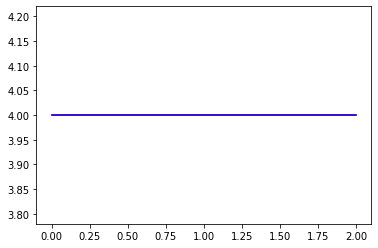

In [270]:
sa1=SA(length=length1,reqs=reqs1,TI=1,TL=1,f=lambda x: 0.99*x,minIter=2,maxEqCIter=1)
sa1.run()

[24 42 30]
[36 48]
[30 19 42]
[36 36 27]
Count Stock:  4
time:  0.01280711299932591


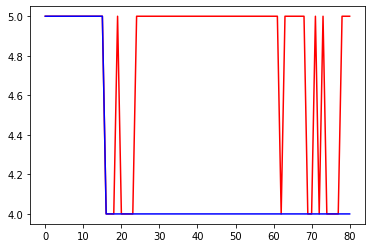

In [271]:
length2=100
reqs2=np.array([48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30],dtype=np.int64)
#np.random.seed(100)
sa2=SA(length=length2,reqs=reqs2,TI=15,TL=8,f=lambda x:0.8*x,minIter=10,maxEqCIter=3)
sa2.run()

[34 16 34 12]
[49 33]
[23 43]
[40 51]
[44 55]
Count Stock:  5
time:  0.01154051100002107


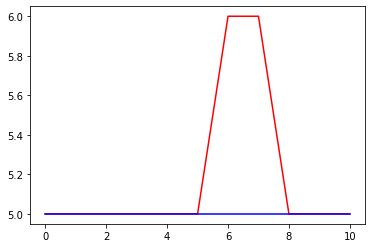

In [272]:
length3=100
reqs3=np.array([16, 34, 49, 12, 43, 44, 34, 23, 33, 40, 55, 51],dtype=np.int64)
sa3=SA(length=length3,reqs=reqs3,TI=10,TL=2,f=lambda x:0.8*x,minIter=5,maxEqCIter=3)
sa3.run()

[495 409]
[402 506]
[518]
[544 278]
[678 286]
[689  71]
[414 123 441]
[609 149]
[686 211]
[218]
[914  33]
[241 648]
[753  70]
[424 517]
[967]
[463 171]
[412 557]
[ 69 788 115]
[653]
[405  43 501]
[618 170 125]
[632 246]
[933]
[ 79 109 286  88]
[627 248  88]
[753 135]
[284 186  78  92 306]
[149 116  45]
[988]
[126 868]
[557 354  46]
[268  61 460]
[312 148 507]
[788  53  60]
[264 525]
[232 365]
[660 106  99]
[346 457]
[716 180]
[592 368]
[251 106 283 315]
[266 515]
[557]
[555  86]
[437 312 145]
[125  23 351 119 224]
[549  84 144]
[333 356 266]
[532 337]
[672  80]
[249 370 118  18 230]
[107 292]
[805]
[581 371]
[187 181 280 149 106]
[987]
[106  92 295 117 301  75]
[662]
Count Stock:  58
time:  0.05406076300005225


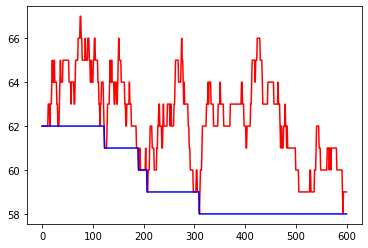

In [273]:
length4=1000
reqs4=np.array([106, 187, 914, 106, 33, 18, 402, 230, 507, 495, 609, 627, 346, 295, 312, 107, 716, 88, 106, 248, 689, 115, 106, 218, 672, 618, 117, 805, 306, 753, 414, 84, 557, 266, 409, 144, 69, 116, 333, 88, 264, 967, 180, 251, 71, 788, 581, 555, 988, 292, 60, 125, 532, 405, 170, 249, 181, 686, 283, 424, 933, 23, 99, 135, 246, 337, 648, 753, 354, 518, 45, 286, 315, 370, 557, 463, 312, 284, 61, 412, 457, 118, 268, 123, 232, 788, 678, 371, 171, 557, 549, 286, 356, 92, 148, 515, 301, 632, 987, 660, 868, 92, 544, 211, 70, 75, 145, 125, 278, 441, 368, 351, 119, 662, 653, 186, 517, 43, 224, 506, 592, 501, 149, 79, 241, 53, 80, 437, 46, 78, 149, 525, 149, 126, 365, 460, 280, 266, 109, 86],dtype=np.int64)
np.random.seed(200)
sa4=SA(length=length4,reqs=reqs4,TI=20,TL=30,f=lambda x:0.84*x,minIter=20,maxEqCIter=3)
sa4.run()

[125 632]
[370 337]
[933]
[441 414]
[211 126 662]
[987]
[409 135 354  45]
[ 88 678  18]
[967]
[405 268]
[672  46  53]
[412 557]
[ 70 507 181]
[988]
[186 107 557]
[753]
[356 495]
[686 312]
[506 106 144]
[544 149]
[365 627]
[549 284 125]
[116 292 515]
[171 145 618]
[402 109 460  23]
[115  43 106 463 118  88]
[ 79 788 123]
[106  71 224 517]
[246 555  80]
[241  69  61 180 119  84]
[251 424 315]
[457]
[868  75]
[280  60 368 278]
[518 306 106]
[148 232  33 437 117]
[581 286]
[266 609]
[660 264]
[286 266  86 230]
[218 653]
[501 351]
[914]
[805  92]
[532 346]
[295  92 592]
[312 525]
[788]
[557 170 248]
[149 301 371]
[648]
[753  78]
[283 689]
[187 149 333 249]
[716  99]
Count Stock:  55
time:  0.20503036900026927


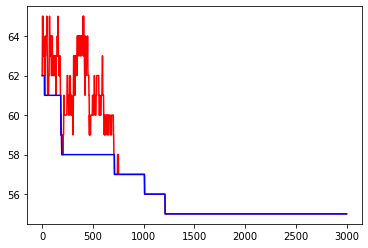

In [274]:
np.random.seed(200)
sa4=SA(length=length4,reqs=reqs4,TI=20,TL=30,f=lambda x:0.84*x,minIter=100,maxEqCIter=3)
sa4.run()

[280 609]
[581 266 149]
[306 333]
[653]
[987]
[457 412]
[549  18 186 224]
[246 678]
[788 106]
[248 368 284]
[805 149]
[753]
[365 148 402]
[648  88]
[506 371]
[525 437]
[914]
[266 618 107]
[171 753]
[126 106 144 557]
[251 116 106 232 211]
[283 632]
[507 312]
[788]
[249  70  88 517]
[149 460 370]
[672 187]
[180 660]
[170 592  46 117]
[662  78 115 118]
[ 60 230 627]
[933  61]
[518  86  53 337]
[125 356 286 218]
[106 315  43  75 145 278]
[555 346]
[354  45 295 119 125]
[967]
[ 71 409 123 286]
[716  92  23 135]
[264 686]
[ 99 268 495]
[868]
[181 515 241]
[441 405]
[557 424]
[532 312]
[557  33  69  84 109]
[301 689]
[988]
[501 292  79]
[463 414  92]
[544  80 351]
Count Stock:  53
time:  13.38638557899958


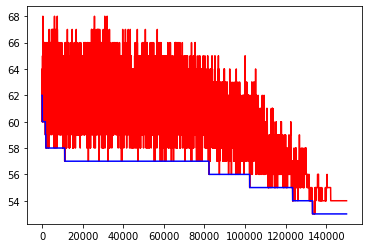

In [283]:
np.random.seed(200)
sa4=SA(length=length4,reqs=reqs4,TI=20,TL=3000,f=lambda x:0.9*x,minIter=50,maxEqCIter=3)
sa4.run()

[ 60 515 412]
[351 123 501]
[ 78 618 280]
[753 106]
[557 251]
[672]
[988]
[106 532]
[549 211 232]
[125 653 107]
[224 125 284  45 278]
[264 495  18]
[315 592]
[180 117  79 368  33]
[506 106  70 283]
[181 660]
[544 405]
[933]
[ 99 686 170]
[788 119  88]
[116 581]
[518 149 333]
[402  75 148 365]
[126 609 115 109]
[149 805]
[627 371]
[868 118]
[525  61 312]
[753 106]
[441  71 312]
[356 557]
[171 678  23  46]
[ 92  92 662]
[230 557]
[354 144]
[632 295  69]
[555 187]
[463 249 266]
[241 507]
[409 437]
[306  43 648]
[716]
[517  84 268]
[346 286 286]
[ 86 266 246 248 135]
[914]
[967]
[414 457]
[689 292]
[788 149]
[460 301 186]
[337 370 145]
[424 218  80  53  88]
[987]
Count Stock:  54
time:  2.0622941749998063


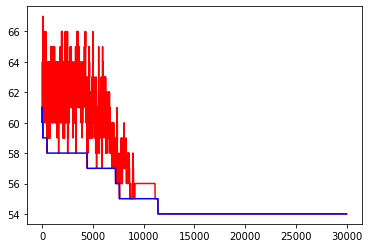

In [298]:
np.random.seed(200)
sa4=SA(length=length4,reqs=reqs4,TI=20,TL=300,f=lambda x:0.86*x,minIter=100,maxEqCIter=3)
sa4.run()